# Import packages

import standard EDA libraries like numpy, pandas, matplotlib.pyplot, seaborn

In [ ]:
#import modules
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import scipy.stats as st 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
import geopandas as gpd 

#set seaborn style
sns.set()

In [ ]:
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x)+1 )/ len (x)
    return x, y

# Load data 

Loading the data and ensure correctness

In [ ]:
#load dataframe
df_raw = pd.read_csv(r"data\cleaned\beer_cleaned.csv")
df = df_raw.copy()

#explore
print(df.info())
print(df.describe())



## Looking at it column by column

In [ ]:
#name_beer
print(df["name_beer"].head())
print(df["name_beer"].describe())
print(df["name_beer"].value_counts().sort_values(ascending=False))
print(df["name_beer"].value_counts()[df["name_beer"].value_counts().values>1])

## -> name_beer describes the general name of the beer incl. a few (78 names are given more than once)

In [ ]:
#abv
abv = df["abv"]
print(abv.describe())

#Standardizing values for abv
SSC = StandardScaler()
abv_stand = SSC.fit_transform(np.array(abv).reshape(-1, 1))
abv_stand = pd.Series(abv_stand.reshape(len(abv_stand)))

#looking at the distribution
#creating subplot structure
fig1, ax = plt.subplots(figsize=[15, 7], sharex=True)

#enterting first plot and plotting sns distplot for general overview
fig1 = plt.subplot(3,1,1)
ax0 = sns.distplot(abv_stand, label="abv")

#entering second subplot
fig1 = plt.subplot(3,1,2)

#generate ecdf quantiles
x_abv, y_abv = ecdf(abv_stand)

#generate normal distribution for comparison
x_norm = np.random.normal(abv_stand.mean(), np.std(abv_stand), size=len(abv_stand))
x_norm, y_norm = ecdf(x_norm)

#plotting the ecdf and comparison function
ax1 = plt.plot(x_abv,y_abv, marker=".", linestyle="none", label="standardized abv")
ax1 = plt.plot(x_norm, y_norm, marker="", label="normal")

#entering third subplot and plotting a vertical boxplot to identify the outliers
fig1 = plt.subplot(3,1,3)
ax2 = sns.boxplot(abv_stand, orient="horizontal", ) 
ax2.set_label("boxplot of standardized abv")
#enabling legend
plt.legend()

outlier_upper = np.mean(abv) + np.quantile(abv, .75, )*1.5
print(outlier_upper)
#Result:    after standardization, the distribution seem to occur normal but skewed right with the mean > median 
#           No missing values: lower bound on 0, outlier above 16.8308 %alcohol by volume

In [ ]:
x = [np.random.random() for r in range(1000)]
num_bins = 50
counts, bins = np.histogram(x, bins=num_bins)
bins = bins[:-1] + (bins[1] - bins[0])/2
probs = counts/float(counts.sum())
print (probs.sum()) # 1.0
plt.bar(bins, probs, 1.0/num_bins)
plt.show()

In [ ]:
#Longitude and Latitude
#describing the position of the brewery on different level of accuracy (sometimes rooftop, sometimes only city)

df_pos = df[["longitude", "latitude"]]
print(df_pos.describe())


#exploration
#due to its positional information we can plot the data on a scatter plot representing points on a world map
#xaxis = Longitude, y_axis = Latitude

#create subplot structure
fig2 = plt.figure(figsize=[100,50])

#enter first subplot
ax21 = plt.subplot(111)

#because of available border shape information, we can plot the borders of the world on this map, using the open source dataset provided by geopandas
#plotting the map first
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world.plot(color = "white", edgecolor="black", ax = ax21)

#plotting the points on world map
sns.scatterplot(x="longitude", y="latitude", data = df, color = "red", marker=".", ax = ax21)
plt.show()
#Most of the data in this dataset was drawn from beers within North America and Europe

<img src="src\plt_beers_on_world.png" />


In [ ]:
# all others are categorical attributes (style, cat) or describing attributes
#-> no need to further inspect them separatly


abv  latitude  longitude
abv        1.000000  0.035503   0.037980
latitude   0.035503  1.000000   0.022665
longitude  0.037980  0.022665   1.000000


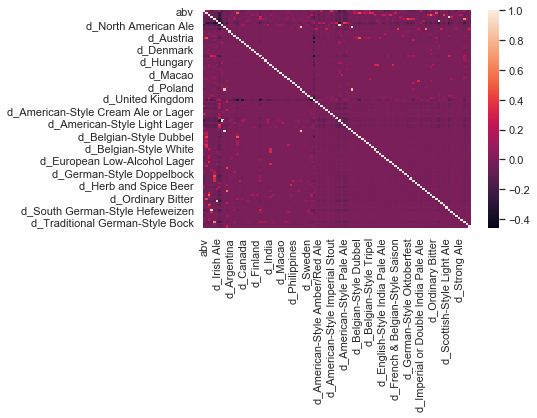

In [25]:
#exploring correlation between variables
print(df.corr())
df_dummies = pd.get_dummies(df[["abv", "cat_name", "country","style_name"]], prefix="d", )
sns.heatmap(df_dummies.corr())
#Result: Maybe it is possible to predict the abv given country and style?

df_dummies.to_csv(r"data\cleaned\beers_w_dummies.csv")